## Week 5 Notebook

Each week, you will apply the concepts of that week to your Integrated Capstone Project’s dataset. In preparation for Milestone One, create a Jupyter Notebook (similar to in Module B, Semester Two) that illustrates these lessons. There are no specific questions to answer in your Jupyter Notebook files in this course; your general goal is to analyze your data using the methods you have learned about in this course and in this program and draw interesting conclusions. 

For Week 5, include concepts such as support vector machines, the kernel trick, and regularization for support vector machines. Complete your Jupyter Notebook homework by 11:59pm ET on Sunday. 

In [1]:
import pandas as pd
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Import feature engineering and selection libraries
from sklearn.svm import SVC, SVR

# data preprocesing and scoring
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import root_mean_squared_error, ConfusionMatrixDisplay, confusion_matrix, accuracy_score, precision_recall_curve, f1_score, roc_curve

random_state = 0

In [2]:
# encode categorical features
def encode_categories(df: pd.DataFrame):
    df_encoded = df.copy()
    mappings = {}
    cat_cols = df_encoded.select_dtypes(include=['object', 'category']).columns.tolist()
    
    for col in cat_cols:
        # get the unique categories (in order of appearance)
        uniques = df_encoded[col].dropna().unique().tolist()
        # build a mapping: category -> code
        mapping = {cat: code for code, cat in enumerate(uniques)}
        mappings[col] = mapping

        # map (leave NaN as NaN)
        df_encoded[col] = df_encoded[col].map(mapping).astype("int64")

    return df_encoded, mappings

In [3]:
# Create a function to load and split data
def load_and_split_data(file_path, test_size=0.2, random_state=random_state, choice='norm'):

    # Read and Encode catigorical features
    df, _ = encode_categories(pd.read_csv(file_path))

    # Feature and target
    X = df.iloc[:, :-1]
    y = df.iloc[:, -1]

    # Train and test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Convert target to DataFrame
    y_train = pd.DataFrame(y_train, columns=[y.name]).reset_index(drop=True)
    y_test = pd.DataFrame(y_test, columns=[y.name]).reset_index(drop=True)

    if choice == 'reg':
        # Regularize the features
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # Convert scaled features back to DataFrames
        X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
        X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_train.columns)

    else:
        # Bormalize the features
        scaler = MinMaxScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # Convert scaled features back to DataFrames
        X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
        X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_train.columns)

    return X_train_scaled, X_test_scaled, y_train, y_test, df

### Model Funcitons

In [12]:
# Create a function that runs SVC or SVR with dynamic class weight option
def run_model(
    X_train, y_train, X_test, y_test, model_type='svc', kernel='linear', C=1.0, gamma='scale', class_weight='balanced'):

    if model_type == 'svc':
        model = SVC(kernel=kernel, C=C, gamma=gamma, random_state=random_state, class_weight=class_weight)

        # reshaye y to 1D array
        y_train = y_train.values.ravel()
        y_test = y_test.values.ravel()

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        return model, y_pred
    
    elif model_type == 'svr':
        model = SVR(kernel=kernel, C=C, gamma=gamma)

        # reshaye y to 1D array
        y_train = y_train.values.ravel()
        y_test = y_test.values.ravel()
        
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)

        return model, y_pred
    
    else:
        raise ValueError("Invalid model type, Choose 'svc' or 'svr'")

In [17]:
# Create a function to evaluate the results and plot the results based on the model type
def evaluate_results(y_test, y_pred, model, model_type='svc'):
    if model_type =='svc':
        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)
        print(f"Accuracy: {accuracy:.2f}")

        # Calculate f1 score
        f1 = f1_score(y_test, y_pred)
        print(f"F1 score: {f1:.2f}")

        # Plot the confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
        disp.plot(cmap=plt.cm.Blues)
        plt.title('Confusion Matrix')
        plt.tight_layout()
        plt.show()

    if model_type == 'svr':
        # Calculate RMSE
        rmse = root_mean_squared_error(y_test, y_pred)
        print(f"RMSE: {rmse:.2f}")

        # Plot the predicted vs actual values
        plt.figure(figsize=(8,6))
        plt.scatter(y_test, y_pred, alpha=.5)
        plt.xlabel("Actual Values")
        plt.ylabel("Predicted Values")
        plt.title("Predicted vs Actual Values")
        plt.tight_layout()
        plt.show()


In [ ]:
# Load the data
# Regularized Data
X_train_car_reg, X_test_car_reg, y_train_car_reg, y_test_car_reg, df_car_reg = load_and_split_data(r'C:\Users\JT von Seggern\DS Masters Repos\2025-spring-B2\data\carclaims_cleaned.csv', choice='reg')
X_train_ins_reg, X_test_ins_reg, y_train_ins_reg, y_test_ins_reg, df_ins_reg = load_and_split_data(r'C:\Users\JT von Seggern\DS Masters Repos\2025-spring-B2\data\insurance_claims_cleaned.csv', choice='reg')
X_train_fur_reg, X_test_fur_reg, y_train_fur_reg, y_test_fur_reg, df_fur_reg = load_and_split_data(r'C:\Users\JT von Seggern\DS Masters Repos\799S-Data-Science-Capstone\Fast_Furious_Insured\train_cleaned.csv', choice='reg')

# Normalized data
X_train_car_norm, X_test_car_norm, y_train_car_norm, y_test_car_norm, df_car_norm = load_and_split_data(r'C:\Users\JT von Seggern\DS Masters Repos\2025-spring-B2\data\carclaims_cleaned.csv', choice='norm')
X_train_ins_norm, X_test_ins_norm, y_train_ins_norm, y_test_ins_norm, df_ins_norm = load_and_split_data(r'C:\Users\JT von Seggern\DS Masters Repos\2025-spring-B2\data\insurance_claims_cleaned.csv', choice='norm')
X_train_fur_norm, X_test_fur_norm, y_train_fur_norm, y_test_fur_norm, df_fur_norm = load_and_split_data(r'C:\Users\JT von Seggern\DS Masters Repos\799S-Data-Science-Capstone\Fast_Furious_Insured\train_cleaned.csv', choice='norm')

In [14]:
# Run SVC for car claims and insurance claims
model_car_reg, y_pred_car_reg = run_model(X_train_car_reg, y_train_car_reg, X_test_car_reg, y_test_car_reg, model_type='svc')
model_ins_reg, y_pred_ins_reg = run_model(X_train_ins_reg, y_train_ins_reg, X_test_ins_reg, y_test_ins_reg, model_type='svc')

Accuracy: 0.61
F1 score: 0.22


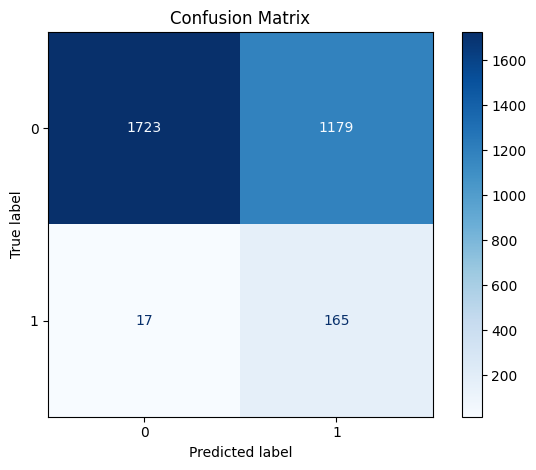

In [15]:
# Evaluate the car claims dataset
evaluate_results(y_test_car_reg, y_pred_car_reg, model_car_reg, model_type='svc')

Accuracy: 0.77
F1 score: 0.64


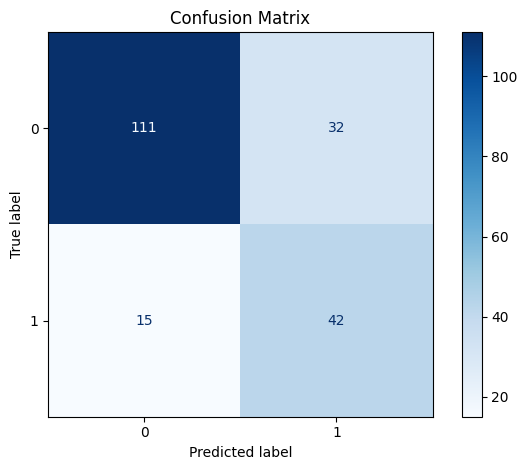

In [16]:
# Evaluate the insurance claims dataset
evaluate_results(y_test_ins_reg, y_pred_ins_reg, model_ins_reg, model_type='svc')

Running Support Vector Classification required multiple iterations to retrieve satisfactory results. Due to target class imbalance, the intial runs for the car claims datasets predicted 0 positive cases of fraud, although the model was 94 percent accurate, it was unusable. The class weight parameter was required to balance out the disproportion of positive to negative cases, and doing so downgraded the accuracy to 61 percent. 

The insurance claims dataset provided better classification without the class weight parameter but was also necessary to even out the classification of cases. It provided better evaluation results after the class weighting and recieved an accuracy score of 77 percent.